<a href="https://colab.research.google.com/github/rzagni/ML-Models/blob/main/single-layer-multiclass-classification-nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

In [ ]:
iris = fetch_ucirepo(id=53)
iris_df = iris.data.original
iris_df = iris_df.sample(frac=1, random_state=42).reset_index(drop=True)
iris_df

,sepal length,sepal width,petal length,petal width,class
0,6.1,2.8,4.7,1.2,Iris-versicolor
1,5.7,3.8,1.7,0.3,Iris-setosa
2,7.7,2.6,6.9,2.3,Iris-virginica
3,6.0,2.9,4.5,1.5,Iris-versicolor
4,6.8,2.8,4.8,1.4,Iris-versicolor
...,...,...,...,...,...
145,6.1,2.8,4.0,1.3,Iris-versicolor
146,4.9,2.5,4.5,1.7,Iris-virginica
147,5.8,4.0,1.2,0.2,Iris-setosa
148,5.8,2.6,4.0,1.2,Iris-versicolor


In [ ]:
X = iris_df[['sepal length', 'petal length']]
y = [0 if label == "Iris-setosa" else 1 if label == "Iris-versicolor" else 2 for label in iris_df['class']]

In [ ]:
X_train = X[:125]
X_test = X[125:]

y_train = y[:125]
y_test = y[125:]

In [ ]:
X_test.reset_index(drop=True, inplace=True)

In [ ]:
print("Datasets lenghts\n")
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")
print(f"y_train: {len(y_train)}")
print(f"y_test: {len(y_test)}")

Datasets lenghts

X_train: 125
X_test: 25
y_train: 125
y_test: 25


In [52]:
import numpy as np

np.random.seed(42)

# Set non-zero initial weights
rnd_multiplier = 0.1
w11 = np.random.rand() * rnd_multiplier
w12 = np.random.rand() * rnd_multiplier
w21 = np.random.rand() * rnd_multiplier
w22 = np.random.rand() * rnd_multiplier
w31 = np.random.rand() * rnd_multiplier
w32 = np.random.rand() * rnd_multiplier
b1 = .0
b2 = .0
b3 = .0

learning_rate = 0.1
accuracy = []
epoch_print_cnt = 10
epochs = 400

for epoch in range(epochs):
    accurate = 0

    for i in range(len(X_train)):
        # Compute Z values for each class
        Z1 = w11 * X_train['sepal length'][i] + w12 * X_train['petal length'][i] + b1
        Z2 = w21 * X_train['sepal length'][i] + w22 * X_train['petal length'][i] + b2
        Z3 = w31 * X_train['sepal length'][i] + w32 * X_train['petal length'][i] + b3
        Z = np.array([Z1, Z2, Z3])

        # Softmax computation

        exp_Z = np.exp(Z)
        total_outputs = np.sum(exp_Z)
        probabilities = exp_Z / total_outputs

        # Predict class
        y_hat_idx = np.argmax(probabilities)

        # Correct gradient calculation for cross-entropy with softmax

        grad1 =  (1 if y_train[i] == 0 else 0) - probabilities[0]
        grad2 =  (1 if y_train[i] == 1 else 0) - probabilities[1]
        grad3 =  (1 if y_train[i] == 2 else 0) - probabilities[2]


        #print(f"grad1: {grad1} grad2: {grad2} grad3: {grad3}")

        # Update weights and biases
        w11 += learning_rate * grad1 * X_train['sepal length'][i]
        w12 += learning_rate * grad1 * X_train['petal length'][i]
        w21 += learning_rate * grad2 * X_train['sepal length'][i]
        w22 += learning_rate * grad2 * X_train['petal length'][i]
        w31 += learning_rate * grad3 * X_train['sepal length'][i]
        w32 += learning_rate * grad3 * X_train['petal length'][i]

        b1 += learning_rate * grad1
        b2 += learning_rate * grad2
        b3 += learning_rate * grad3

        # Count correct predictions
        if y_train[i] == y_hat_idx:
            accurate += 1

    # Calculate accuracy for this epoch
    epoch_accuracy = accurate / len(X_train)
    accuracy.append(epoch_accuracy)

    # Print progress every few epochs
    if (epoch + 1) % epoch_print_cnt == 0:
        print(f"Epoch: {epoch + 1} -> Accuracy: {epoch_accuracy:.4f}")
        # print(f"Z: {Z}")
        # print(f"y_hat_idx: {y_hat_idx}")
        # print(f"Grad 1: {grad1} , Grad 2 : {grad2} , Grad3: {grad3}")
        # print(f"W11: {w11}, W12: {w12}, W21: {w21}, W22: {w22}, W31: {w31}, W32: {w32}")
        # print(f"B1: {b1}, B2: {b2}, B3: {b3}")

print()
print(f"Final Weights -> W11: {w11}, W12: {w12}, W21: {w21}, W22: {w22}, W31: {w31}, W32: {w32}")
print(f"Final Biases -> B1: {b1}, B2: {b2}, B3: {b3}")


Epoch: 10 -> Accuracy: 0.8240
Epoch: 20 -> Accuracy: 0.8400
Epoch: 30 -> Accuracy: 0.8560
Epoch: 40 -> Accuracy: 0.8560
Epoch: 50 -> Accuracy: 0.8480
Epoch: 60 -> Accuracy: 0.8400
Epoch: 70 -> Accuracy: 0.8400
Epoch: 80 -> Accuracy: 0.8560
Epoch: 90 -> Accuracy: 0.8480
Epoch: 100 -> Accuracy: 0.8560
Epoch: 110 -> Accuracy: 0.8720
Epoch: 120 -> Accuracy: 0.8800
Epoch: 130 -> Accuracy: 0.8800
Epoch: 140 -> Accuracy: 0.8720
Epoch: 150 -> Accuracy: 0.8720
Epoch: 160 -> Accuracy: 0.8800
Epoch: 170 -> Accuracy: 0.8880
Epoch: 180 -> Accuracy: 0.8960
Epoch: 190 -> Accuracy: 0.9040
Epoch: 200 -> Accuracy: 0.9040
Epoch: 210 -> Accuracy: 0.9040
Epoch: 220 -> Accuracy: 0.9040
Epoch: 230 -> Accuracy: 0.9040
Epoch: 240 -> Accuracy: 0.9120
Epoch: 250 -> Accuracy: 0.9200
Epoch: 260 -> Accuracy: 0.9200
Epoch: 270 -> Accuracy: 0.9200
Epoch: 280 -> Accuracy: 0.9200
Epoch: 290 -> Accuracy: 0.9200
Epoch: 300 -> Accuracy: 0.9200
Epoch: 310 -> Accuracy: 0.9280
Epoch: 320 -> Accuracy: 0.9360
Epoch: 330 -> Acc

In [47]:
weights = [w11, w12, w21, w22, w31, w32]
biases = [b1, b2, b3]

predictions = []

class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

for i in range(len(X_test)):

    Z1 = w11 * X_test['sepal length'][i] + w12 * X_test['petal length'][i] + b1
    Z2 = w21 * X_test['sepal length'][i] + w22 * X_test['petal length'][i] + b2
    Z3 = w31 * X_test['sepal length'][i] + w32 * X_test['petal length'][i] + b3

    Z = np.array([Z1, Z2, Z3])
    Z_stable = Z - np.max(Z)  # Stabilize softmax
    exp_Z = np.exp(Z_stable)
    total_outputs = np.sum(exp_Z)
    probabilities = exp_Z / total_outputs

    y_hat = np.argmax(probabilities)
    predictions.append(y_hat)

predicted_class_names = [class_names[y_hat] for y_hat in predictions]
actual_class_names = [class_names[y] for y in y_test]

accurate = 0
inaccurate = 0
total = len(predictions)

print("Predicted  Actual  Outcome  Predicted Class  Actual Class   ")
print("---------  ------  -------  ---------------  ---------------")
for i, (pred, actual) in enumerate(zip(predictions, y_test)):
    if pred == actual:
        accurate += 1
        outcome = '\u2713'
    else:
        outcome = '\u2717'
        inaccurate += 1
    print(f"    {pred}         {actual}       {outcome}     {predicted_class_names[i]:>15}  {actual_class_names[i]}")

test_accuracy = accurate / len(X_test)
print(f"Accuracy: {test_accuracy:.4f} Accurate Cnt: {accurate} Innacurate Cnt: {inaccurate}")

Predicted  Actual  Outcome  Predicted Class  Actual Class   
---------  ------  -------  ---------------  ---------------
    1         1       ✓     Iris-versicolor  Iris-versicolor
    2         2       ✓      Iris-virginica  Iris-virginica
    2         2       ✓      Iris-virginica  Iris-virginica
    0         0       ✓         Iris-setosa  Iris-setosa
    1         1       ✓     Iris-versicolor  Iris-versicolor
    2         2       ✓      Iris-virginica  Iris-virginica
    2         2       ✓      Iris-virginica  Iris-virginica
    0         0       ✓         Iris-setosa  Iris-setosa
    2         2       ✓      Iris-virginica  Iris-virginica
    0         0       ✓         Iris-setosa  Iris-setosa
    1         1       ✓     Iris-versicolor  Iris-versicolor
    2         2       ✓      Iris-virginica  Iris-virginica
    2         2       ✓      Iris-virginica  Iris-virginica
    1         1       ✓     Iris-versicolor  Iris-versicolor
    2         2       ✓      Iris-virginica

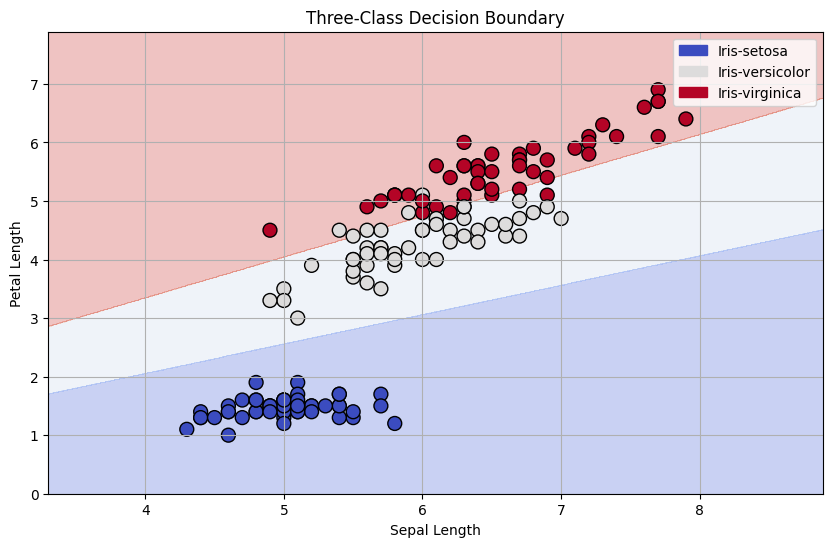

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define mesh grid limits
x_min, x_max = X['sepal length'].min() - 1, X['sepal length'].max() + 1
y_min, y_max = X['petal length'].min() - 1, X['petal length'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Define weights and biases for the three classes
weights = [w11, w12, w21, w22, w31, w32]
biases = [b1, b2, b3]

# Calculate decision boundaries by evaluating each model across the grid
Z1 = weights[0] * xx + weights[1] * yy + biases[0]
Z2 = weights[2] * xx + weights[3] * yy + biases[1]
Z3 = weights[4] * xx + weights[5] * yy + biases[2]

# Stack the outputs for each class and apply softmax with stabilization
Z = np.array([Z1, Z2, Z3])
Z_max = np.max(Z, axis=0, keepdims=True)  # Maximum for stabilization
exp_Z = np.exp(Z - Z_max)  # Subtract max before exponentiating
probabilities = exp_Z / np.sum(exp_Z, axis=0)  # Softmax across classes
decision_boundary = np.argmax(probabilities, axis=0)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, decision_boundary, alpha=0.3, cmap='coolwarm')

# Plot the training data points
scatter = plt.scatter(X['sepal length'], X['petal length'], c=y, edgecolor='k', s=100, cmap='coolwarm')

# Class names for legend
plt.title('Three-Class Decision Boundary')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Create custom legend
from matplotlib import patches
patches = [patches.Patch(color=scatter.cmap(scatter.norm(i)), label=class_names[i]) for i in range(len(class_names))]
plt.legend(handles=patches)

plt.grid()
plt.show()


In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [ ]:
layers = [
    nn.Linear(2,3)
]
model = nn.Sequential(*layers)
loss_function = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters())


In [ ]:
model = nn.Sequential(*layers)
model = model.to(device)

In [ ]:
def get_batch_accuracy(output, y):
    pred = output.argmax(dim=1, keepdim=True)  # Get predictions
    correct = pred.eq(y.view_as(pred)).sum().item()  # Check if predictions match targets
    return correct


In [ ]:
def train():
    total_loss = 0
    total_correct = 0
    total_samples = len(X_train_tensor)

    model.train()
    for x, y in zip(X_train_tensor, y_train_tensor):
        x, y = x.to(device).unsqueeze(0), y.to(device)  # Add batch dimension
        output = model(x)

        optimizer.zero_grad()
        batch_loss = loss_function(output, y.unsqueeze(0))  # Add batch dimension for loss calculation
        batch_loss.backward()
        optimizer.step()

        total_loss += batch_loss.item()
        total_correct += get_batch_accuracy(output, y)

    accuracy = total_correct / total_samples
    print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(total_loss, accuracy))


In [ ]:
epochs = 60
for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train()


Epoch: 0
Train - Loss: 296.3947 Accuracy: 0.3040
Epoch: 1
Train - Loss: 195.8402 Accuracy: 0.3040
Epoch: 2
Train - Loss: 139.7927 Accuracy: 0.3520
Epoch: 3
Train - Loss: 119.4498 Accuracy: 0.3040
Epoch: 4
Train - Loss: 112.6001 Accuracy: 0.3280
Epoch: 5
Train - Loss: 108.9331 Accuracy: 0.4080
Epoch: 6
Train - Loss: 105.9404 Accuracy: 0.5840
Epoch: 7
Train - Loss: 103.1861 Accuracy: 0.6720
Epoch: 8
Train - Loss: 100.6036 Accuracy: 0.7680
Epoch: 9
Train - Loss: 98.1765 Accuracy: 0.7760
Epoch: 10
Train - Loss: 95.8941 Accuracy: 0.7840
Epoch: 11
Train - Loss: 93.7463 Accuracy: 0.7840
Epoch: 12
Train - Loss: 91.7235 Accuracy: 0.7840
Epoch: 13
Train - Loss: 89.8169 Accuracy: 0.7840
Epoch: 14
Train - Loss: 88.0183 Accuracy: 0.8080
Epoch: 15
Train - Loss: 86.3200 Accuracy: 0.8320
Epoch: 16
Train - Loss: 84.7149 Accuracy: 0.8400
Epoch: 17
Train - Loss: 83.1965 Accuracy: 0.8480
Epoch: 18
Train - Loss: 81.7586 Accuracy: 0.8480
Epoch: 19
Train - Loss: 80.3956 Accuracy: 0.8480
Epoch: 20
Train - Los

In [ ]:
def validate(model, X_test_tensor, y_test_tensor):
    model.eval()  # Set the model to evaluation mode
    accurate = 0
    inaccurate = 0
    total_samples = len(X_test_tensor)
    predictions = []



    with torch.no_grad():  # Disable gradient calculation
        for x, y in zip(X_test_tensor, y_test_tensor):
            x = x.to(device).unsqueeze(0)  # Add batch dimension
            y = y.to(device).unsqueeze(0)  # Add batch dimension

            output = model(x)
            pred = output.argmax(dim=1, keepdim=True).item()  # Get the predicted class

            predictions.append(pred)

            if pred == y.item():
                accurate += 1
                outcome = '\u2713'  # Checkmark for correct prediction
            else:
                outcome = '\u2717'  # Cross for incorrect prediction
                inaccurate += 1

    predicted_class_names = [class_names[y_hat] for y_hat in predictions]
    actual_class_names = [class_names[y] for y in y_test]

    test_accuracy = accurate / total_samples
    print(f"Accuracy: {test_accuracy:.4f} Accurate Cnt: {accurate} Inaccurate Cnt: {inaccurate}")

    # Print detailed predictions
    print("Predicted  Actual  Outcome  Predicted Class  Actual Class")
    print("---------  ------  -------  ---------------  ---------------")
    for i, (pred, actual) in enumerate(zip(predictions, y_test_tensor)):
        print(f"    {pred}         {actual.item()}       {outcome}     {predicted_class_names[pred]:>15}  {actual_class_names[actual.item()]}")


In [ ]:
validate(model, X_test_tensor, y_test_tensor)

Accuracy: 1.0000 Accurate Cnt: 25 Inaccurate Cnt: 0
Predicted  Actual  Outcome  Predicted Class  Actual Class
---------  ------  -------  ---------------  ---------------
    1         1       ✓      Iris Virginica  Iris Virginica
    2         2       ✓      Iris Virginica  Iris Virginica
    2         2       ✓      Iris Virginica  Iris Virginica
    0         0       ✓     Iris Versicolor  Iris Versicolor
    1         1       ✓      Iris Virginica  Iris Virginica
    2         2       ✓      Iris Virginica  Iris Virginica
    2         2       ✓      Iris Virginica  Iris Virginica
    0         0       ✓     Iris Versicolor  Iris Versicolor
    2         2       ✓      Iris Virginica  Iris Virginica
    0         0       ✓     Iris Versicolor  Iris Versicolor
    1         1       ✓      Iris Virginica  Iris Virginica
    2         2       ✓      Iris Virginica  Iris Virginica
    2         2       ✓      Iris Virginica  Iris Virginica
    1         1       ✓      Iris Virginica  I

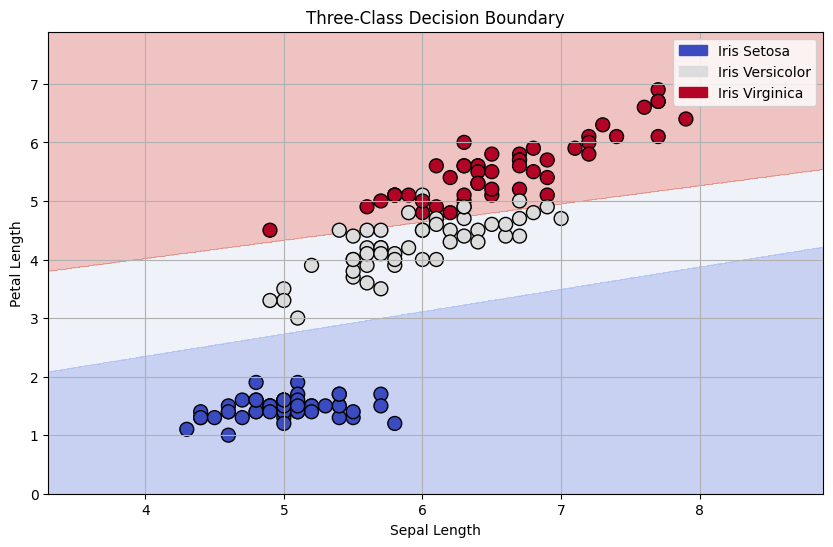

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define mesh grid limits
x_min, x_max = X_train['sepal length'].min() - 1, X_train['sepal length'].max() + 1
y_min, y_max = X_train['petal length'].min() - 1, X_train['petal length'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Access weights and biases from the trained PyTorch model
weights = model[0].weight.detach().cpu().numpy()  # Get weights from the first (and only) layer
biases = model[0].bias.detach().cpu().numpy()  # Get biases from the first (and only) layer

# Calculate decision boundaries by evaluating each model across the grid
Z1 = weights[0, 0] * xx + weights[0, 1] * yy + biases[0]
Z2 = weights[1, 0] * xx + weights[1, 1] * yy + biases[1]
Z3 = weights[2, 0] * xx + weights[2, 1] * yy + biases[2]

# Stack the outputs for each class and apply softmax with stabilization
Z = np.array([Z1, Z2, Z3])
Z_max = np.max(Z, axis=0, keepdims=True)  # Maximum for stabilization
exp_Z = np.exp(Z - Z_max)  # Subtract max before exponentiating
probabilities = exp_Z / np.sum(exp_Z, axis=0)  # Softmax across classes
decision_boundary = np.argmax(probabilities, axis=0)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, decision_boundary, alpha=0.3, cmap='coolwarm')

# Plot the training data points
scatter = plt.scatter(X['sepal length'], X['petal length'], c=y, edgecolor='k', s=100, cmap='coolwarm')

# Class names for legend
plt.title('Three-Class Decision Boundary')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

class_names = ["Iris Setosa", "Iris Versicolor", "Iris Virginica"]

# Create custom legend
from matplotlib import patches
patches = [patches.Patch(color=scatter.cmap(scatter.norm(i)), label=class_names[i]) for i in range(len(class_names))]
plt.legend(handles=patches)

plt.grid()
plt.show()
